# Proyecto caso de estudio
## ¿En que difieren los conductores de bicicletas casuales de los miembros de Cyclistic?
### Nombre: Diego Beltran
## Objetivo:

El objetivo de este analisis es saber en que se diferencian los conductores casuales de los miembros de Cyclistic y como se les pueden incentivar a los usuarios casuales, suscribirse a Cyclistic.

## Paso 1: Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Lectura de archivos de los ultimos 12 meses

In [2]:
filepaths = [f for f in os.listdir(".") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,31D38723D5A8665A,electric_bike,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member
1,67CB39987F4E895B,electric_bike,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member
2,DA61204FD26EC681,electric_bike,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,member
3,06F160D46AF235DD,electric_bike,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,member
4,6FCA41D4317601EB,electric_bike,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,member


## Paso 2: Limpieza de datos

### 1. Calculo de tiempo de viaje
En este caso, se calcula el tiempo de viaje que tienen los conductores restando la fecha y hora del termino del viaje y el inicio de este, redondeado a 2 decimales. Se guarda en una columna llamada 'ride_length'.

In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_length'] = df['ended_at']-df['started_at']
df['ride_length'] = np.around(df['ride_length'].dt.total_seconds() / 60,2)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,31D38723D5A8665A,electric_bike,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member,0.02
1,67CB39987F4E895B,electric_bike,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member,21.68
2,DA61204FD26EC681,electric_bike,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,member,1.87
3,06F160D46AF235DD,electric_bike,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,member,19.78
4,6FCA41D4317601EB,electric_bike,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,member,17.19


### 2. Encuentro y formateo de nombre de dia de la semana

En este caso, pandas tiene una funcion que transforma una fecha en un dia de la semana.

In [4]:
df['day_of_week'] = df['started_at'].dt.day_name()
label1={'Sunday':'Domingo','Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miercoles', 'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sabado'}
df['day_of_week'] = df['day_of_week'].replace(label1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,31D38723D5A8665A,electric_bike,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member,0.02,Jueves
1,67CB39987F4E895B,electric_bike,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,member,21.68,Jueves
2,DA61204FD26EC681,electric_bike,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,member,1.87,Jueves
3,06F160D46AF235DD,electric_bike,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,member,19.78,Jueves
4,6FCA41D4317601EB,electric_bike,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,member,17.19,Martes


In [5]:
label2={'member':'Miembro','casual':'Casual'}
df['member_casual']=df['member_casual'].replace(label2)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,31D38723D5A8665A,electric_bike,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,Miembro,0.02,Jueves
1,67CB39987F4E895B,electric_bike,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,Miembro,21.68,Jueves
2,DA61204FD26EC681,electric_bike,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,Miembro,1.87,Jueves
3,06F160D46AF235DD,electric_bike,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,Miembro,19.78,Jueves
4,6FCA41D4317601EB,electric_bike,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,Miembro,17.19,Martes


In [6]:
label3 = {'electric_bike': 'Bicicleta Electrica', 'electric_scooter': 'Scooter Electrico', 'classic_bike': 'Bicicleta Clasica'}
df['rideable_type']=df['rideable_type'].replace(label3)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,31D38723D5A8665A,Bicicleta Electrica,2024-09-26 15:30:58.150,2024-09-26 15:30:59.437,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,Miembro,0.02,Jueves
1,67CB39987F4E895B,Bicicleta Electrica,2024-09-26 15:31:32.529,2024-09-26 15:53:13.501,NaN,NaN,NaN,NaN,41.91,-87.63,41.91,-87.63,Miembro,21.68,Jueves
2,DA61204FD26EC681,Bicicleta Electrica,2024-09-26 15:00:33.012,2024-09-26 15:02:25.406,NaN,NaN,NaN,NaN,41.90,-87.62,41.90,-87.63,Miembro,1.87,Jueves
3,06F160D46AF235DD,Bicicleta Electrica,2024-09-26 18:19:06.491,2024-09-26 18:38:53.515,NaN,NaN,NaN,NaN,41.91,-87.63,41.90,-87.62,Miembro,19.78,Jueves
4,6FCA41D4317601EB,Bicicleta Electrica,2024-09-03 19:49:57.054,2024-09-03 20:07:08.464,NaN,NaN,NaN,NaN,41.90,-87.69,41.90,-87.63,Miembro,17.19,Martes


## Paso 3. Calculos y visualizaciones

### Estadisticas basicas

In [7]:
#Calculos basicos
prom = df['ride_length'].mean()
maxx = df['ride_length'].max()
mode = df['ride_length'].mode()
labels=['Promedio','Maximo','Moda']
values=[prom, maxx, mode[0]]
edf = pd.DataFrame({'Estadisticas':labels,'Resultados':values})
edf

,Estadisticas,Resultados
0,Promedio,16.078276
1,Maximo,1574.900000
2,Moda,0.030000


### Tiempo promedio de viaje de tipo de usuario

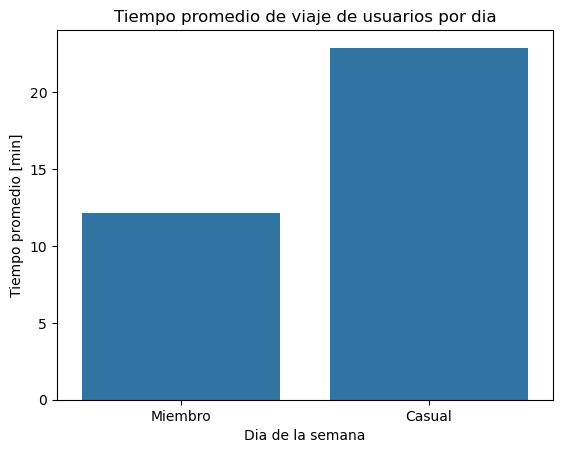

In [8]:
viaje=df.groupby('member_casual')['ride_length'].mean().reset_index() #plot.bar(title="Tiempo promedio de viaje de tipo de usuario", xlabel= 'Tipo de usuario', ylabel='Tiempo promedio [min]')
ax = sns.barplot(data=viaje, x='member_casual', y='ride_length', order=['Miembro','Casual'])
ax.set_title("Tiempo promedio de viaje de usuarios por dia")
ax.set_xlabel("Dia de la semana")
ax.set_ylabel("Tiempo promedio [min]")
plt.show()

### Tiempo promedio usado por miembros y casuales y por dia de semana

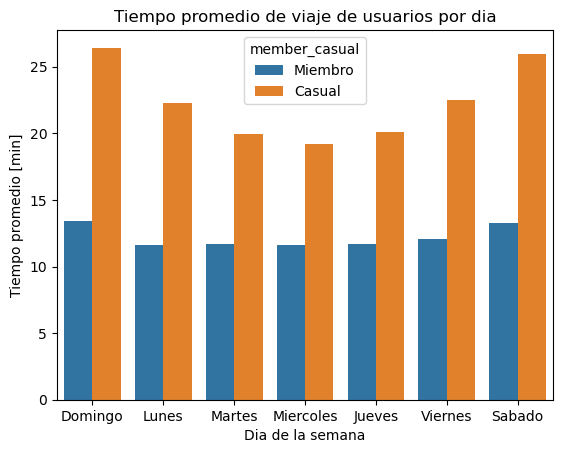

In [9]:
#Promedio de tiempo usado por miembros y casuales y por dia de semana
prom = df.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()
ax = sns.barplot(data=prom, x='day_of_week', y='ride_length', hue='member_casual', order=['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado'], hue_order=['Miembro','Casual'])
ax.set_title("Tiempo promedio de viaje de usuarios por dia")
ax.set_xlabel("Dia de la semana")
ax.set_ylabel("Tiempo promedio [min]")
plt.show()

### Numero de viajes por dia de semana

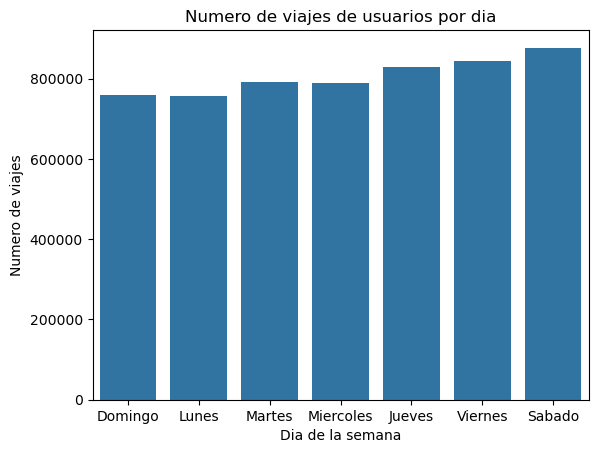

In [10]:
#Numero de viajes por dia de semana
trips= df.groupby('day_of_week')['ride_id'].count().reset_index()
ax = sns.barplot(data=trips, x='day_of_week', y='ride_id', order=['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado'])
ax.set_title("Numero de viajes de usuarios por dia")
ax.set_xlabel("Dia de la semana")
ax.set_ylabel("Numero de viajes")
plt.show()

### Numero de viajes de usuarios por tipo de bicicleta

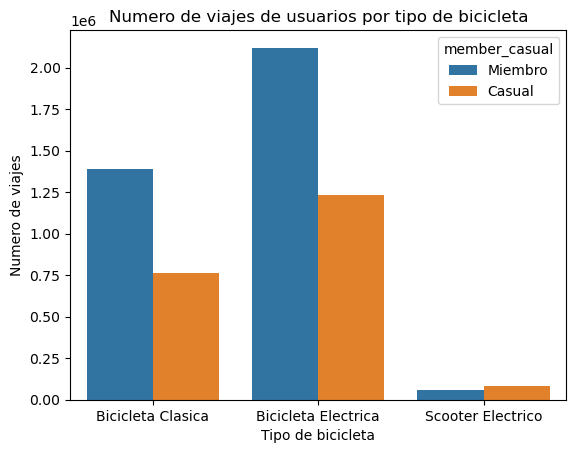

In [11]:
tipo = df.groupby(['member_casual','rideable_type'])['ride_id'].count().reset_index()
ax = sns.barplot(data=tipo, x='rideable_type', y='ride_id', hue='member_casual', order=['Bicicleta Clasica','Bicicleta Electrica', 'Scooter Electrico'], hue_order=['Miembro', 'Casual'])
ax.set_title("Numero de viajes de usuarios por tipo de bicicleta")
ax.set_xlabel("Tipo de bicicleta")
ax.set_ylabel("Numero de viajes")
plt.show()

## Paso 4: Conclusiones

La diferencia principal que estan los usuarios es que los usuarios casuales viajan por mas tiempo durante los fines de semana, mientras que los miembros de pago viajan de manera constante durante todos los dias de semana. Ademas, los sabados parece ser que los usuarios tanto casuales como miembros de pago, registran mas viajes que otros dias, indicando que, quizas, gracias al tiempo libre disponible, tengan mas tiempo para realizar estos viajes. Por ultimo, existe un mayor numero de viajes relacionados a bicicletas clasicas y electricas que scooters, por lo que recomendaria al equipo de marketing de la empresa que enfoque su campaña en bicicletas clasicas y electricas para fines de semana.

#### Notas del autor

Este caso de estudio fue hecho gracias al programa Google Data Analytics Certificate. Si bien durante el programa se pasan tanto Hojas de calculo (Google o Excel) y ademas de R, he decidido hacer este proyecto en python ya que 